In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/home/kizito/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [135]:
3 26 59

In [73]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/kizito/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [170]:
 train_df.info()
# test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   MSZoning       1460 non-null   int64
 2   LotFrontage    1460 non-null   int64
 3   LotArea        1460 non-null   int64
 4   Street         1460 non-null   int64
 5   LotShape       1460 non-null   int64
 6   LandContour    1460 non-null   int64
 7   Utilities      1460 non-null   int64
 8   LotConfig      1460 non-null   int64
 9   LandSlope      1460 non-null   int64
 10  Neighborhood   1460 non-null   int64
 11  Condition1     1460 non-null   int64
 12  Condition2     1460 non-null   int64
 13  BldgType       1460 non-null   int64
 14  HouseStyle     1460 non-null   int64
 15  OverallQual    1460 non-null   int64
 16  OverallCond    1460 non-null   int64
 17  YearBuilt      1460 non-null   int64
 18  YearRemodAdd   1460 non-null   int64
 19  RoofSt

In [89]:
# print all the columns with null values
train_null_columns = []
test_null_columns = []
train_cols = train_df.columns
test_cols = test_df.columns
print('Columns and number of missing values in Train data\n')
for col in train_cols:
    if train_df[col].isnull().sum() > 0:
        train_null_columns.append(col)
        print(f"{col}: {train_df[col].isnull().sum()}")
print('*******************************************************')
print('Columns and number of missing values in Test data\n')
for col in test_cols:
    if test_df[col].isnull().sum() > 0:
        test_null_columns.append(col)
        print(f"{col}: {test_df[col].isnull().sum()}")

Columns and number of missing values in Train data

*******************************************************
Columns and number of missing values in Test data



In [76]:
# drop columns with over 50% missing data
train_df = train_df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)
test_df = test_df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

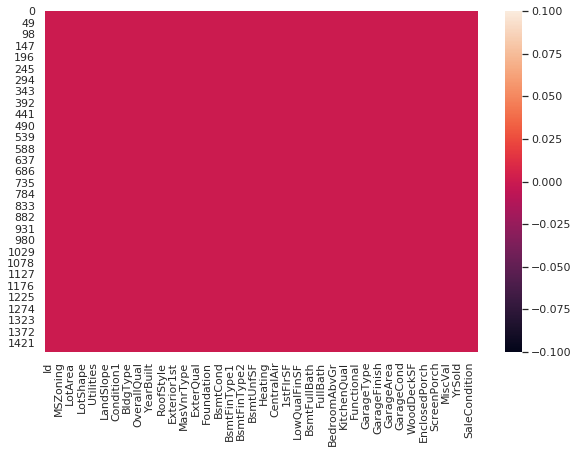

In [104]:
# sns.set(rc={'figure.figsize':(9.7,6.27)})
# sns.heatmap(train_df.isna())

In [80]:
def fill_data(dataset,column):
    mean = dataset[column].mean()
    std = dataset[column].std()
    is_null = dataset[column].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_num = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in column with random values generated
    col_slice = dataset[column].copy()
    col_slice[np.isnan(col_slice)] = rand_num
    dataset[column] = col_slice
    dataset[column] = dataset[column].astype(int)

In [84]:
fill_data(dataset=train_df,column='LotFrontage')
fill_data(dataset=train_df,column='MasVnrArea')
fill_data(dataset=train_df,column='GarageYrBlt')

In [85]:
fill_data(dataset=test_df,column='MasVnrArea')
fill_data(dataset=test_df,column='BsmtFinSF1')
fill_data(dataset=test_df,column='BsmtFinSF2')
fill_data(dataset=test_df,column='BsmtUnfSF')
fill_data(dataset=test_df,column='TotalBsmtSF')
# fill_data(dataset=test_df,column='BsmtFullBath')
fill_data(dataset=test_df,column='GarageYrBlt')
fill_data(dataset=test_df,column='GarageCars')
fill_data(dataset=test_df,column='GarageArea')


In [88]:
# train_df['MasVnrType'].value_counts()
# train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')
# train_df['BsmtQual'].value_counts()
# train_df['BsmtQual'] = train_df['BsmtQual'].fillna('TA')
# train_df['BsmtCond'].value_counts()
# train_df['BsmtCond'] = train_df['BsmtQual'].fillna('TA')
# train_df['BsmtExposure'].value_counts()
# train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna('No')
# train_df['BsmtFinType1'].value_counts()
# train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna('Unf')
# train_df['BsmtFinType2'].value_counts()
# train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna('Unf')
# train_df['Electrical'].value_counts()
# train_df['Electrical'] = train_df['Electrical'].fillna('SBrkr')
# train_df['GarageType'].value_counts()
# train_df['GarageType'] = train_df['GarageType'].fillna('Attchd')
# train_df['GarageFinish'].value_counts()
# train_df['GarageFinish'] = train_df['GarageFinish'].fillna('Unf')
# train_df['GarageQual'].value_counts()
# train_df['GarageQual'] = train_df['GarageQual'].fillna('TA')
# train_df['GarageCond'].value_counts()
# train_df['GarageCond'] = train_df['GarageCond'].fillna('TA')

for cols in train_null_columns:
    train_df[cols] = train_df[cols].fillna(train_df[cols].value_counts().idxmax())
    
for cols in test_null_columns:
    test_df[cols] = test_df[cols].fillna(test_df[cols].value_counts().idxmax())


([<matplotlib.patches.Wedge at 0x7ff62c5ec510>,
 [Text(-1.3946609256342648, 0.8817147512143462, 'Normal'),
  Text(1.07832311367538, -1.248887209684459, 'Abnorml'),
  Text(1.5369893806978698, -0.6001363541912615, 'Partial'),
  Text(1.6396818509734659, -0.1842374217910926, 'AdjLand'),
  Text(1.6484722872413993, -0.07098674662998801, 'Alloca'),
  Text(1.6499388819984244, -0.014201608000134978, 'Family')])

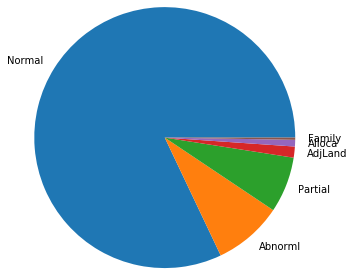

In [93]:
label = train_df['SaleCondition'].unique()
plt.pie(train_df['SaleCondition'].value_counts(),labels=label,radius=1.5)

([<matplotlib.patches.Wedge at 0x7ff62bf27310>,
 [Text(-1.4074591788702464, 0.8611380027695285, 'Normal'),
  Text(1.10159880519471, -1.2284054999850773, 'Abnorml'),
  Text(1.5262639247656076, -0.6269118215180539, 'Partial'),
  Text(1.6333658400449471, -0.23370073293480442, 'AdjLand'),
  Text(1.647002012281685, -0.09942017672525079, 'Alloca'),
  Text(1.649755195060332, -0.028421758767655892, 'Family')])

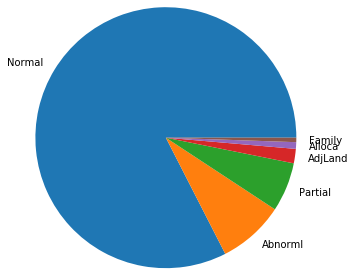

In [94]:
plt.pie(test_df['SaleCondition'].value_counts(),labels=label,radius=1.5)

In [95]:
label_encoder = preprocessing.LabelEncoder()

In [96]:
obj_col = []
for colu in train_df:
    if train_df[colu].dtypes == 'object':
        obj_col.append(colu)

In [97]:
for c in obj_col:
    train_df[c] = label_encoder.fit_transform(train_df[c])

In [169]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [150]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report, confusion_matrix,r2_score
from sklearn.model_selection import GridSearchCV

In [176]:
X = train_df.drop(['SalePrice'],1)
y = train_df['SalePrice']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [178]:
sc = StandardScaler()
sc.fit_transform(X_train)
sc.fit_transform(X_test)

array([[-1.25321503e-01,  1.51484918e+00,  6.26931205e-01, ...,
        -6.33142115e-01,  3.24874468e-01,  2.33028217e-01],
       [-1.25321503e-01, -4.78922628e+00, -4.20345179e-01, ...,
         1.59131975e+00, -5.01953931e+00, -3.14106630e+00],
       [-1.25321503e-01, -6.11696820e-02, -4.20345179e-01, ...,
         8.49832464e-01,  3.24874468e-01,  2.33028217e-01],
       ...,
       [ 6.14779419e-01, -6.11696820e-02,  1.00395070e+00, ...,
         1.59131975e+00,  3.24874468e-01, -3.14106630e+00],
       [ 7.38129573e-01, -6.11696820e-02, -1.68998847e-01, ...,
         1.08345175e-01,  3.24874468e-01,  2.33028217e-01],
       [-8.65422426e-01,  1.51484918e+00, -1.43462518e-03, ...,
         1.08345175e-01,  3.24874468e-01,  2.33028217e-01]])

In [179]:
linalg = LinearRegression(normalize=True)
linalg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [180]:
pred = linalg.predict(X_test)

In [181]:
r2_score(y_test,pred)

0.8454024725614648

In [153]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(linalg,parameters, cv=None)
grid.fit(X_train, y_train)
grid.best_params_


{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [137]:
# logmodel = LogisticRegression()
# logmodel.fit(X_train, y_train)

# predictions = logmodel.predict(X_test)
# r2_score(y_test,predictions)

In [121]:
# print(classification_report(y_test,predictions))

In [164]:
test_obj_col = []
for colu in test_df:
    if test_df[colu].dtypes == 'object':
        test_obj_col.append(colu)

In [165]:
for c in test_obj_col:
    test_df[c] = label_encoder.fit_transform(test_df[c])

In [183]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


In [188]:
preds = test_df.drop(['Id'],1)
sc.fit_transform(preds)
prediction = linalg.predict(preds)

In [189]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": prediction
    })

In [190]:
submission.head()

,Id,SalePrice
0,1461,106214.735143
1,1462,138208.123751
2,1463,168154.469041
3,1464,188335.137562
4,1465,189714.016086


In [158]:
train_df = train_df.drop(['Id'],1)

In [191]:
submission.to_csv('submission.csv', index=False)

In [168]:
preds.shape

(1459, 74)

In [182]:
X_train.shape

(1022, 74)